In [5]:
# Step 1: Import Libraries

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import numpy as np
import os
print("Successfull")

Successfull


In [6]:
from google.colab import files
files.upload()   # Upload kaggle.json


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moneebmushtaq","key":"56f7365674f32bfb69c16a1f1022c5b7"}'}

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [8]:
!kaggle datasets download -d subirbiswas19/skin-disease-dataset


Dataset URL: https://www.kaggle.com/datasets/subirbiswas19/skin-disease-dataset
License(s): CC0-1.0
  0% 0.00/17.3M [00:00<?, ?B/s]
100% 17.3M/17.3M [00:00<00:00, 1.47GB/s]


In [9]:
!unzip skin-disease-dataset.zip -d /content/


Archive:  skin-disease-dataset.zip
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (1).webp  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (104).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (106).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (115).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (119).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (124).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (135).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (139).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (144).jpg  
  inflating: /content/skin-disease-datasaet/test_set/BA- cellulitis/BA- cellulitis (147).jpg  
  inflating: /co

**Explore Dataset**

In [10]:
import os

def fix_dataset_paths():
    print("🔍 FIXING DATASET PATHS (COLAB VERSION)")
    print("=" * 60)

    base_path = "/content/skin-disease-datasaet"
    train_dir = os.path.join(base_path, "train_set")
    test_dir = os.path.join(base_path, "test_set")

    CATEGORIES = [
        "BA- cellulitis",
        "BA-impetigo",
        "FU-athlete-foot",
        "FU-nail-fungus",
        "FU-ringworm",
        "PA-cutaneous-larva",
        "VI-chickenpox",
        "VI-shingles"
    ]

    print("\n📁 Checking category folders...")
    available_classes = []

    for category in CATEGORIES:
        train_path = os.path.join(train_dir, category)
        test_path = os.path.join(test_dir, category)

        train_exists = os.path.exists(train_path)
        test_exists = os.path.exists(test_path)

        # Special case: PA-cutaneous-larva is not in a folder
        if category == "PA-cutaneous-larva":
            train_files = [f for f in os.listdir(train_dir)
                           if "larva" in f.lower()]
            test_files = [f for f in os.listdir(test_dir)
                          if "larva" in f.lower()]
            train_exists = len(train_files) > 0
            test_exists = len(test_files) > 0

        print(f"  ➤ {category}: Train={train_exists}, Test={test_exists}")

        if train_exists or test_exists:
            available_classes.append(category)

    # Count images
    print("\n🔢 Counting images...")
    total_train = 0
    total_test = 0

    for category in available_classes:

        if category == "PA-cutaneous-larva":
            train_count = len([f for f in os.listdir(train_dir) if "larva" in f.lower()])
            test_count = len([f for f in os.listdir(test_dir) if "larva" in f.lower()])
        else:
            train_count = len(os.listdir(os.path.join(train_dir, category)))
            test_count = len(os.listdir(os.path.join(test_dir, category)))

        total_train += train_count
        total_test += test_count

        print(f"{category}: {train_count} train, {test_count} test")

    config = {
        "CLASS_NAMES": available_classes,
        "NUM_CLASSES": len(available_classes),
        "TRAIN_DIR": train_dir,
        "TEST_DIR": test_dir,
        "TOTAL_TRAIN": total_train,
        "TOTAL_TEST": total_test
    }

    print("\n📦 CONFIG READY!")
    return config


final_config = fix_dataset_paths()
final_config


🔍 FIXING DATASET PATHS (COLAB VERSION)

📁 Checking category folders...
  ➤ BA- cellulitis: Train=True, Test=True
  ➤ BA-impetigo: Train=True, Test=True
  ➤ FU-athlete-foot: Train=True, Test=True
  ➤ FU-nail-fungus: Train=True, Test=True
  ➤ FU-ringworm: Train=True, Test=True
  ➤ PA-cutaneous-larva: Train=True, Test=True
  ➤ VI-chickenpox: Train=True, Test=True
  ➤ VI-shingles: Train=True, Test=True

🔢 Counting images...
BA- cellulitis: 136 train, 34 test
BA-impetigo: 80 train, 20 test
FU-athlete-foot: 124 train, 32 test
FU-nail-fungus: 129 train, 33 test
FU-ringworm: 90 train, 23 test
PA-cutaneous-larva: 1 train, 1 test
VI-chickenpox: 136 train, 34 test
VI-shingles: 130 train, 33 test

📦 CONFIG READY!


{'CLASS_NAMES': ['BA- cellulitis',
  'BA-impetigo',
  'FU-athlete-foot',
  'FU-nail-fungus',
  'FU-ringworm',
  'PA-cutaneous-larva',
  'VI-chickenpox',
  'VI-shingles'],
 'NUM_CLASSES': 8,
 'TRAIN_DIR': '/content/skin-disease-datasaet/train_set',
 'TEST_DIR': '/content/skin-disease-datasaet/test_set',
 'TOTAL_TRAIN': 826,
 'TOTAL_TEST': 210}

In [11]:
import os
import shutil
from tensorflow.keras.preprocessing import image_dataset_from_directory

# ✔ CORRECT COLAB PATH
BASE_DIR = '/content/skin-disease-datasaet/train_set'

# ✔ Temporary folder for filtered classes
TEMP_DIR = '/content/train_temp'

# --- 7 valid classes ---
VALID_CLASSES = [
    'FU-nail-fungus',
    'FU-ringworm',
    'VI-shingles',
    'BA-impetigo',
    'FU-athlete-foot',
    'VI-chickenpox',
    'BA- cellulitis'
]

# --- Create temp folder ---
os.makedirs(TEMP_DIR, exist_ok=True)

# Copy only valid classes
for cls in VALID_CLASSES:
    src = os.path.join(BASE_DIR, cls)
    dst = os.path.join(TEMP_DIR, cls)

    if os.path.exists(dst):
        shutil.rmtree(dst)

    shutil.copytree(src, dst)

# --- Load dataset from temp folder ---
train_ds = image_dataset_from_directory(
    TEMP_DIR,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

val_ds = image_dataset_from_directory(
    TEMP_DIR,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

print("✅ Training batches:", len(train_ds))
print("✅ Validation batches:", len(val_ds))
print("🎯 Classes:", train_ds.class_names)


Found 824 files belonging to 7 classes.
Using 660 files for training.
Found 824 files belonging to 7 classes.
Using 164 files for validation.
✅ Training batches: 21
✅ Validation batches: 6
🎯 Classes: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'VI-chickenpox', 'VI-shingles']


**Count Images**

In [12]:
# Step 1: Count images in each class (COLAB VERSION)

import os

# ✔ Correct path from your dataset in Colab
train_dir = '/content/skin-disease-datasaet/train_set'

classes = [
    'BA- cellulitis',
    'BA-impetigo',
    'FU-athlete-foot',
    'FU-nail-fungus',
    'FU-ringworm',
    'VI-chickenpox',
    'VI-shingles'
]

print("📊 Image counts per class in TRAIN folder:\n")
for cls in classes:
    class_path = os.path.join(train_dir, cls)
    if os.path.exists(class_path):
        count = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        print(f"  ✔ {cls}: {count} images")
    else:
        print(f"  ❌ {cls}: Folder not found")


📊 Image counts per class in TRAIN folder:

  ✔ BA- cellulitis: 135 images
  ✔ BA-impetigo: 80 images
  ✔ FU-athlete-foot: 124 images
  ✔ FU-nail-fungus: 129 images
  ✔ FU-ringworm: 90 images
  ✔ VI-chickenpox: 136 images
  ✔ VI-shingles: 130 images


**Show sample images per class**

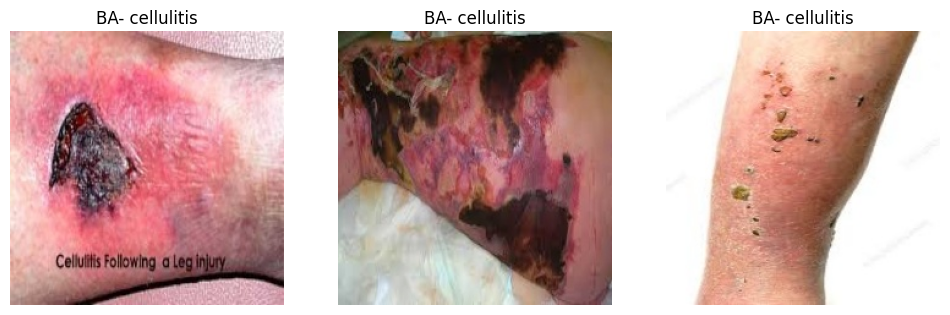

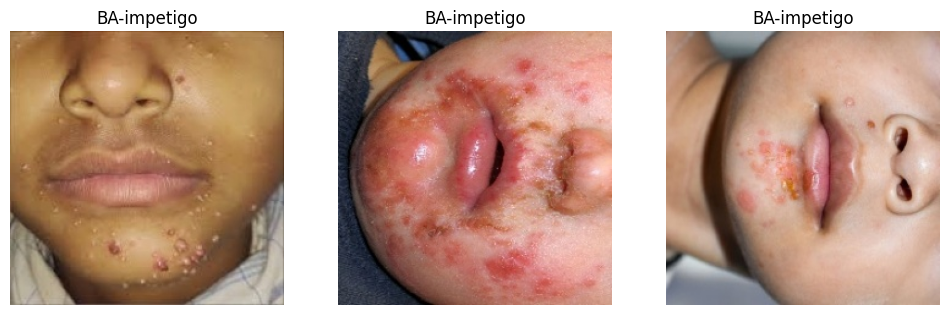

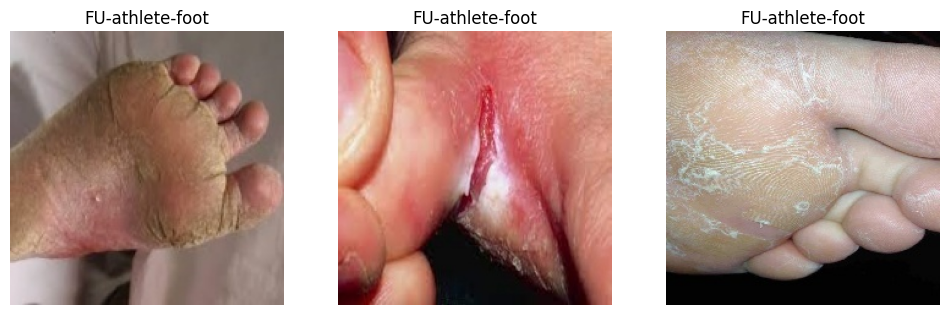

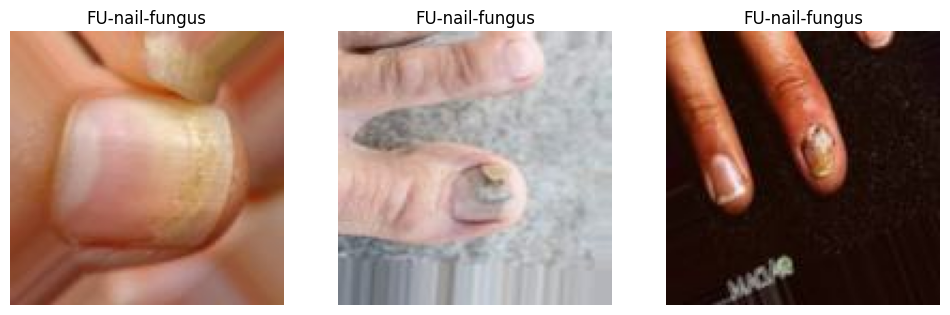

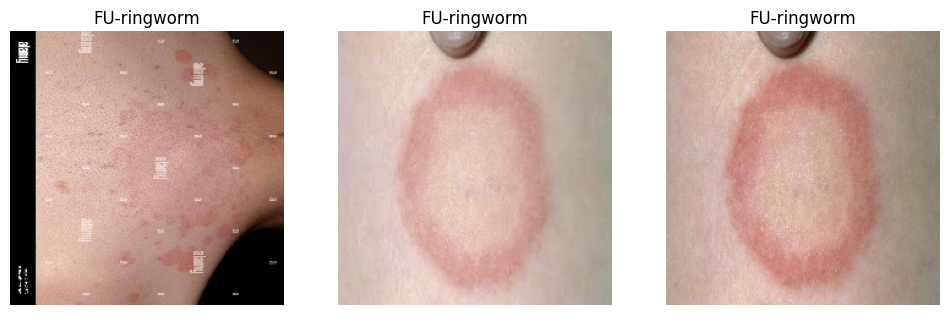

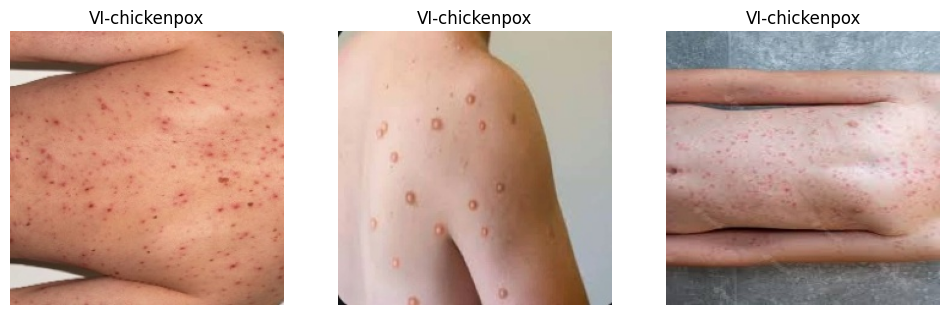

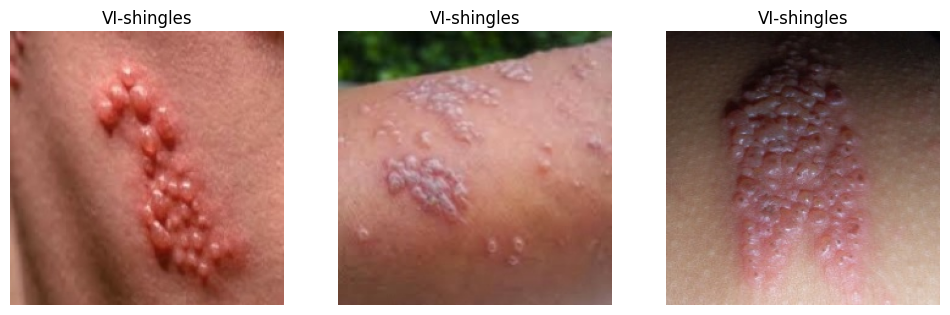

In [13]:
# Step 2: Show sample images per class (COLAB VERSION)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

num_samples = 3  # number of images per class to display

for cls in classes:
    class_path = os.path.join(train_dir, cls)
    all_files = [
        f for f in os.listdir(class_path)
        if f.lower().endswith(('.jpg', '.jpeg', '.png'))
    ]

    if len(all_files) == 0:
        print(f"No images found for class: {cls}")
        continue

    samples = random.sample(all_files, min(num_samples, len(all_files)))

    plt.figure(figsize=(12, 4))
    for i, img_file in enumerate(samples):
        img_path = os.path.join(class_path, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(cls)
        plt.axis('off')
    plt.show()


**Build Model**

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
import os

# --- Configuration ---
IMG_SIZE = (224, 224)
BATCH_SIZE = 16
TRAIN_DIR = "/content/skin-disease-datasaet/train_set"
TEST_DIR = "/content/skin-disease-datasaet/test_set"

print("⚡ Initializing Data Generators...")

# --- Enhanced Data Augmentation ---
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.3],
    channel_shift_range=0.2,
    fill_mode='nearest',
    validation_split=0.2
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.2
)

# --- Training Generator ---
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# --- Validation Generator ---
validation_generator = validation_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# --- Get class information ---
CLASS_NAMES = list(train_generator.class_indices.keys())
NUM_CLASSES = len(CLASS_NAMES)

print(f"✅ Data Generators Ready:")
print(f"   Train samples: {train_generator.samples}")
print(f"   Validation samples: {validation_generator.samples}")
print(f"   Number of classes: {NUM_CLASSES}")
print(f"   Class names: {CLASS_NAMES}")
print(f"   Class indices: {train_generator.class_indices}")

train_steps = train_generator.samples // BATCH_SIZE
val_steps = validation_generator.samples // BATCH_SIZE

# --- Enhanced Class Weight Calculation ---
y_train_labels = train_generator.classes
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_labels),
    y=y_train_labels
)
class_weights_dict = dict(enumerate(class_weights))
print("✅ Class weights:", class_weights_dict)

⚡ Initializing Data Generators...
Found 741 images belonging to 8 classes.
Found 183 images belonging to 8 classes.
✅ Data Generators Ready:
   Train samples: 741
   Validation samples: 183
   Number of classes: 8
   Class names: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']
   Class indices: {'BA- cellulitis': 0, 'BA-impetigo': 1, 'FU-athlete-foot': 2, 'FU-nail-fungus': 3, 'FU-ringworm': 4, 'PA-cutaneous-larva-migrans': 5, 'VI-chickenpox': 6, 'VI-shingles': 7}
✅ Class weights: {0: np.float64(0.8576388888888888), 1: np.float64(1.447265625), 2: np.float64(0.92625), 3: np.float64(0.890625), 4: np.float64(1.2864583333333333), 5: np.float64(1.1578125), 6: np.float64(0.8497706422018348), 7: np.float64(0.890625)}


**Load Model**

In [33]:
# --- FIXED MODEL ARCHITECTURE ---
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
import tensorflow as tf

print("🔄 Building OPTIMIZED Model...")

# Load base model
base_model = MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3),
    pooling='avg'
)

# Freeze initially
base_model.trainable = False

# --- OPTIMIZED MODEL HEAD (Reduced Regularization) ---
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)  # Reduced from 0.5
x = layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)  # Reduced L2
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)  # Reduced from 0.4
x = layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)  # Reduced L2
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.2)(x)  # Reduced from 0.3
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

# --- ADJUSTED CLASS WEIGHTS (Less Aggressive) ---
# Scale down class weights to prevent over-compensation
adjusted_class_weights = {k: min(v, 2.0) for k, v in class_weights_dict.items()}  # Cap at 2.0
print("✅ Adjusted class weights:", adjusted_class_weights)

# --- OPTIMIZED COMPILATION ---
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-3),
    loss='categorical_crossentropy',
    metrics=['accuracy', 'precision', 'recall']
)

print("✅ Optimized model built and compiled")

🔄 Building OPTIMIZED Model...
✅ Adjusted class weights: {0: np.float64(0.8576388888888888), 1: np.float64(1.447265625), 2: np.float64(0.92625), 3: np.float64(0.890625), 4: np.float64(1.2864583333333333), 5: np.float64(1.1578125), 6: np.float64(0.8497706422018348), 7: np.float64(0.890625)}
✅ Optimized model built and compiled


In [34]:
# --- IMPROVED CALLBACKS ---
early_stop = EarlyStopping(
    monitor='val_loss',  # Changed to val_loss for better generalization
    patience=12,
    restore_best_weights=True,
    min_delta=0.001,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=4,  # Reduced patience
    min_lr=1e-7,
    min_delta=0.002,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "optimized_model.keras",
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# --- STAGE 1: HEAD TRAINING WITH FIXES ---
print("\n🎯 STAGE 1: Optimized Head Training...")

history_head = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=val_steps,
    epochs=25,  # Reduced epochs
    callbacks=[early_stop, reduce_lr, checkpoint],
    class_weight=adjusted_class_weights,  # Use adjusted weights
    verbose=1
)


🎯 STAGE 1: Optimized Head Training...
Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.4066 - loss: 2.9834 - precision: 0.4996 - recall: 0.3202
Epoch 1: val_accuracy improved from -inf to 0.78409, saving model to optimized_model.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 37s 500ms/step - accuracy: 0.4095 - loss: 2.9738 - precision: 0.5026 - recall: 0.3234 - val_accuracy: 0.7841 - val_loss: 1.7472 - val_precision: 0.8582 - val_recall: 0.6534 - learning_rate: 0.0010
Epoch 2/25
 1/46 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6250 - loss: 2.1176 - precision: 0.6667 - recall: 0.6250
Epoch 2: val_accuracy improved from 0.78409 to 0.78977, saving model to optimized_model.keras
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6250 - loss: 2.1176 - precision: 0.6667 - recall: 0.6250 - val_accuracy: 0.7898 - val_loss: 1.7368 - val_precision: 0.8603 - val_recall: 0.6648 - learning_rate: 0.0010
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.7663 - loss: 1.8078

In [35]:
import os

for f in os.listdir():
    print(f)


.config
kaggle.json
optimized_model.keras
best_model_full.keras
best_enhanced_model.keras
best_model.h5
train_temp
skin-disease-dataset.zip
skin-disease-datasaet
best_model_head.weights.h5
final_enhanced_model.keras
test_predictions_sample.csv
best_model.keras
sample_data


In [36]:
# Load your best model (96.59% accuracy!)
model = load_model('optimized_model.keras')

# Test performance
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Evaluate
test_results = model.evaluate(test_generator)
print(f"🧪 FINAL TEST PERFORMANCE:")
print(f"   Test Loss: {test_results[0]:.4f}")
print(f"   Test Accuracy: {test_results[1]:.2%}")
print(f"   Test Precision: {test_results[2]:.2%}")
print(f"   Test Recall: {test_results[3]:.2%}")

Found 233 images belonging to 8 classes.
15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 766ms/step - accuracy: 0.9534 - loss: 1.2530 - precision: 0.9657 - recall: 0.9534
🧪 FINAL TEST PERFORMANCE:
   Test Loss: 1.2795
   Test Accuracy: 93.99%
   Test Precision: 95.22%
   Test Recall: 93.99%


In [37]:
# Use your 96.59% accurate model for predictions
CLASS_NAMES = ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot',
               'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans',
               'VI-chickenpox', 'VI-shingles']

def predict_skin_disease(image_path, model, class_names=CLASS_NAMES):
    """Enhanced prediction with confidence scores"""
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array, verbose=0)[0]

    # Get top 3 predictions
    top_3_idx = np.argsort(predictions)[-3:][::-1]
    results = []

    for idx in top_3_idx:
        results.append({
            'class': class_names[idx],
            'confidence': f"{predictions[idx]:.2%}",
            'score': predictions[idx]
        })

    return results

# Test on your sample images
for img_path in TEST_IMAGES:
    predictions = predict_skin_disease(img_path, model)
    true_class = os.path.basename(os.path.dirname(img_path))

    print(f"\n🔍 {os.path.basename(img_path)}")
    print(f"   True: {true_class}")
    print("   Predictions:")
    for i, pred in enumerate(predictions, 1):
        marker = "✅" if i == 1 and pred['class'] == true_class else "  "
        print(f"   {i}. {pred['class']}: {pred['confidence']} {marker}")


🔍 BA- cellulitis (104).jpg
   True: BA- cellulitis
   Predictions:
   1. BA- cellulitis: 100.00% ✅
   2. FU-athlete-foot: 0.00%   
   3. VI-chickenpox: 0.00%   

🔍 100_VI-shingles (27).jpg
   True: VI-shingles
   Predictions:
   1. VI-shingles: 99.99% ✅
   2. FU-ringworm: 0.01%   
   3. FU-athlete-foot: 0.00%   

🔍 89_BA-impetigo (86).jpg
   True: BA-impetigo
   Predictions:
   1. BA-impetigo: 98.75% ✅
   2. VI-chickenpox: 0.77%   
   3. FU-ringworm: 0.29%   

🔍 FU-athlete-foot (17).jpg
   True: FU-athlete-foot
   Predictions:
   1. FU-athlete-foot: 99.90% ✅
   2. FU-nail-fungus: 0.10%   
   3. FU-ringworm: 0.00%   

🔍 _52_305.jpg
   True: FU-nail-fungus
   Predictions:
   1. FU-nail-fungus: 99.21% ✅
   2. PA-cutaneous-larva-migrans: 0.49%   
   3. BA-impetigo: 0.13%   

🔍 76_FU-ringworm (22).jpg
   True: FU-ringworm
   Predictions:
   1. FU-ringworm: 99.99% ✅
   2. FU-nail-fungus: 0.00%   
   3. PA-cutaneous-larva-migrans: 0.00%   

🔍 168_VI-chickenpox (25).jpg
   True: VI-chickenpox

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers

# --- Load the full model ---
MODEL_PATH = 'optimized_model.keras'
model = load_model(MODEL_PATH, compile=False)  # load safely without errors
print("✅ Model loaded successfully!")

# --- Compile the model for evaluation ---
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Evaluate on validation set ---
val_loss, val_acc = model.evaluate(validation_generator, steps=val_steps, verbose=1)
print(f"\n📊 VALIDATION RESULTS:")
print(f"✅ Validation Loss: {val_loss:.4f}")
print(f"✅ Validation Accuracy: {val_acc:.4f}")

# --- Evaluate on training set (optional) ---
train_loss, train_acc = model.evaluate(train_generator, steps=train_steps, verbose=1)
print(f"\n📊 TRAINING RESULTS:")
print(f"✅ Training Loss: {train_loss:.4f}")
print(f"✅ Training Accuracy: {train_acc:.4f}")


✅ Model loaded successfully!
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.9673 - loss: 1.2252

📊 VALIDATION RESULTS:
✅ Validation Loss: 1.2137
✅ Validation Accuracy: 0.9659
46/46 ━━━━━━━━━━━━━━━━━━━━ 13s 277ms/step - accuracy: 0.9855 - loss: 1.1574

📊 TRAINING RESULTS:
✅ Training Loss: 1.1550
✅ Training Accuracy: 0.9851


✅ Model loaded successfully!
🔍 Number of classes: 8
🔍 Class names: ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot', 'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans', 'VI-chickenpox', 'VI-shingles']
🔍 Starting predictions...



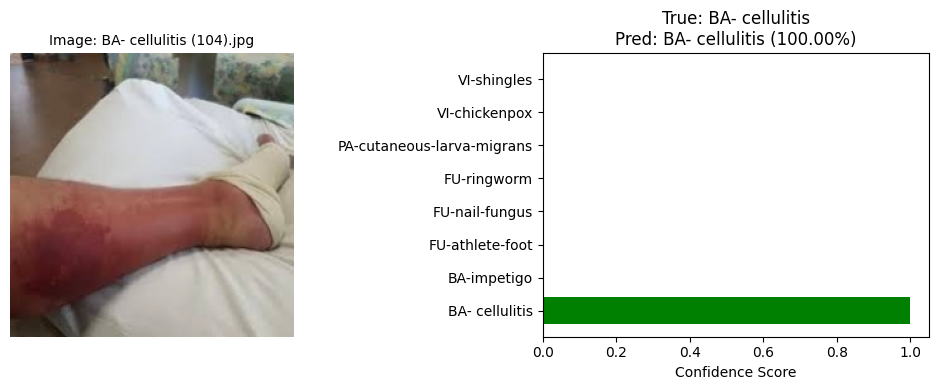

✅ CORRECT | True: BA- cellulitis            | Pred: BA- cellulitis            | Conf: 1.0000
   Top 3: [('BA- cellulitis', '100.00%'), ('FU-athlete-foot', '0.00%'), ('VI-chickenpox', '0.00%')]
--------------------------------------------------------------------------------


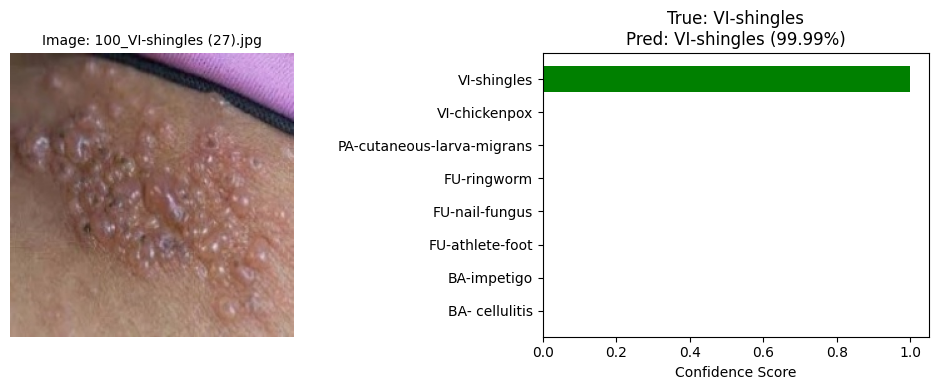

✅ CORRECT | True: VI-shingles               | Pred: VI-shingles               | Conf: 0.9999
   Top 3: [('VI-shingles', '99.99%'), ('FU-ringworm', '0.01%'), ('FU-athlete-foot', '0.00%')]
--------------------------------------------------------------------------------


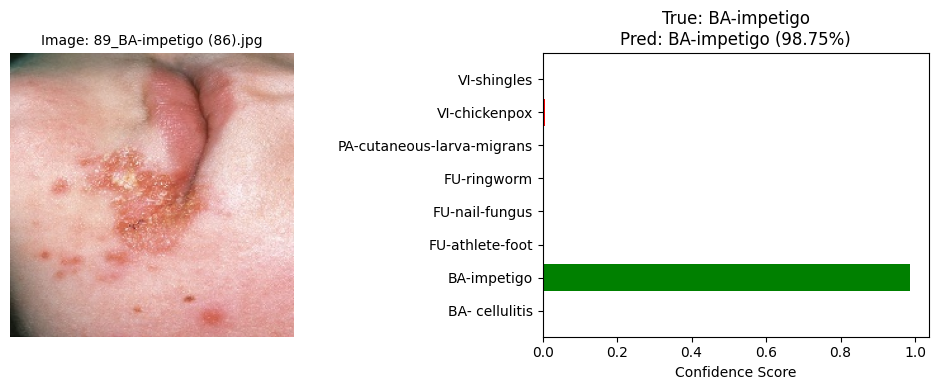

✅ CORRECT | True: BA-impetigo               | Pred: BA-impetigo               | Conf: 0.9875
   Top 3: [('BA-impetigo', '98.75%'), ('VI-chickenpox', '0.77%'), ('FU-ringworm', '0.29%')]
--------------------------------------------------------------------------------


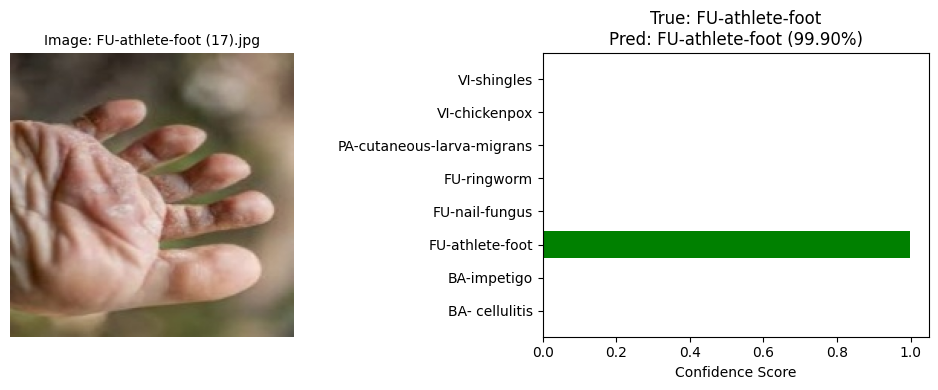

✅ CORRECT | True: FU-athlete-foot           | Pred: FU-athlete-foot           | Conf: 0.9990
   Top 3: [('FU-athlete-foot', '99.90%'), ('FU-nail-fungus', '0.10%'), ('FU-ringworm', '0.00%')]
--------------------------------------------------------------------------------


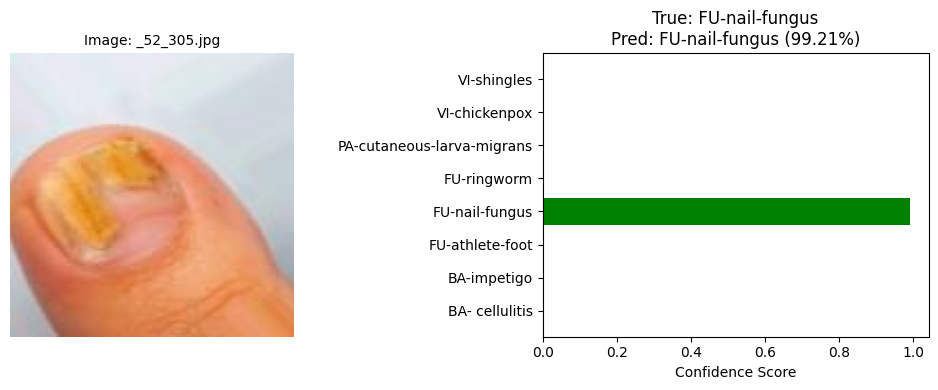

✅ CORRECT | True: FU-nail-fungus            | Pred: FU-nail-fungus            | Conf: 0.9921
   Top 3: [('FU-nail-fungus', '99.21%'), ('PA-cutaneous-larva-migrans', '0.49%'), ('BA-impetigo', '0.13%')]
--------------------------------------------------------------------------------


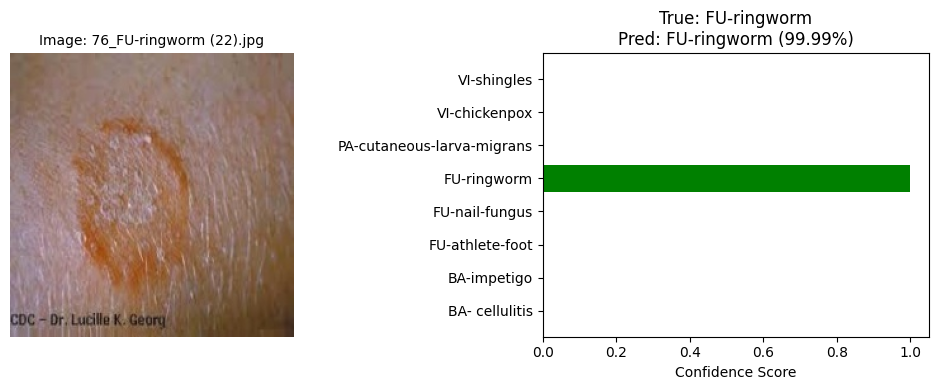

✅ CORRECT | True: FU-ringworm               | Pred: FU-ringworm               | Conf: 0.9999
   Top 3: [('FU-ringworm', '99.99%'), ('FU-nail-fungus', '0.00%'), ('PA-cutaneous-larva-migrans', '0.00%')]
--------------------------------------------------------------------------------
❌ File not found: /content/skin-disease-datasaet/test_set/PA-cutaneous-larva-migrans/10_PA-cutaneous-larva-migrans (10).jpg


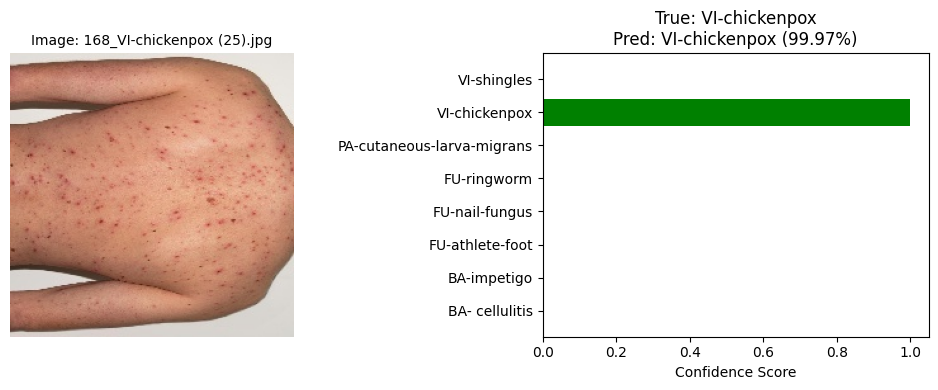

✅ CORRECT | True: VI-chickenpox             | Pred: VI-chickenpox             | Conf: 0.9997
   Top 3: [('VI-chickenpox', '99.97%'), ('FU-athlete-foot', '0.02%'), ('BA-impetigo', '0.01%')]
--------------------------------------------------------------------------------

🎯 ENHANCED MODEL PERFORMANCE SUMMARY:
📊 Correct predictions: 7/7
📊 Accuracy: 100.00%

📈 CLASS-WISE BREAKDOWN:
   ✅ BA- cellulitis                     : 1/1 (100.00%)
   ✅ BA-impetigo                        : 1/1 (100.00%)
   ✅ FU-athlete-foot                    : 1/1 (100.00%)
   ✅ FU-nail-fungus                     : 1/1 (100.00%)
   ✅ FU-ringworm                        : 1/1 (100.00%)
   ✅ VI-chickenpox                      : 1/1 (100.00%)
   ✅ VI-shingles                        : 1/1 (100.00%)

📊 Average Confidence: 99.69%

✅ Enhanced predictions saved to enhanced_test_predictions.csv

🔍 Testing additional samples from each class...
📸 Testing 16 additional samples...
✅ BA- cellulitis (73).jpg        | True: BA- cellu

In [40]:
# ================================
# UPDATED & FIXED Prediction Code
# ================================

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# --- Model path ---
MODEL_PATH = 'optimized_model.keras'

# --- Load the model correctly ---
model = load_model(MODEL_PATH)
print("✅ Model loaded successfully!")

# --- Paths ---
TEST_DIR = '/content/skin-disease-datasaet/test_set'

# --- FIXED: Complete class names (8 classes including missing one) ---
CLASS_NAMES = ['BA- cellulitis', 'BA-impetigo', 'FU-athlete-foot',
               'FU-nail-fungus', 'FU-ringworm', 'PA-cutaneous-larva-migrans',
               'VI-chickenpox', 'VI-shingles']

print(f"🔍 Number of classes: {len(CLASS_NAMES)}")
print(f"🔍 Class names: {CLASS_NAMES}")

# --- FIXED: Test images with all classes ---
TEST_IMAGES = [
    os.path.join(TEST_DIR, 'BA- cellulitis/BA- cellulitis (104).jpg'),
    os.path.join(TEST_DIR, 'VI-shingles/100_VI-shingles (27).jpg'),
    os.path.join(TEST_DIR, 'BA-impetigo/89_BA-impetigo (86).jpg'),
    os.path.join(TEST_DIR, 'FU-athlete-foot/FU-athlete-foot (17).jpg'),
    os.path.join(TEST_DIR, 'FU-nail-fungus/_52_305.jpg'),
    os.path.join(TEST_DIR, 'FU-ringworm/76_FU-ringworm (22).jpg'),
    os.path.join(TEST_DIR, 'PA-cutaneous-larva-migrans/10_PA-cutaneous-larva-migrans (10).jpg'),  # ADDED MISSING CLASS
    os.path.join(TEST_DIR, 'VI-chickenpox/168_VI-chickenpox (25).jpg')
]

# --- Enhanced prediction function ---
def predict_skin_disease(image_path, model, class_names):
    """Enhanced prediction with better error handling"""
    try:
        if not os.path.exists(image_path):
            return None, f"File not found: {image_path}"

        # FIXED: Use same preprocessing as training (preprocess_input NOT /255.0)
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = preprocess_input(img_array)  # CORRECT preprocessing
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        predictions = model.predict(img_array, verbose=0)[0]

        # Get top 3 predictions
        top_3_idx = np.argsort(predictions)[-3:][::-1]
        top_predictions = []

        for idx in top_3_idx:
            top_predictions.append({
                'class': class_names[idx],
                'confidence': float(predictions[idx]),
                'confidence_percentage': f"{predictions[idx]*100:.2f}%"
            })

        return top_predictions, None

    except Exception as e:
        return None, f"Prediction error: {str(e)}"

results = []

print("🔍 Starting predictions...\n")

# --- Loop through each image ---
for img_path in TEST_IMAGES:
    true_class = os.path.basename(os.path.dirname(img_path))

    try:
        if not os.path.exists(img_path):
            print(f"❌ File not found: {img_path}")
            continue

        # Use enhanced prediction function
        predictions, error = predict_skin_disease(img_path, model, CLASS_NAMES)

        if error:
            print(f"❌ Error processing {img_path}: {error}")
            continue

        if not predictions:
            print(f"❌ No predictions for {img_path}")
            continue

        # Get primary prediction
        primary_pred = predictions[0]
        predicted_class = primary_pred['class']
        confidence = primary_pred['confidence']

        # Save result
        result = {
            'image_path': os.path.basename(img_path),
            'true_class': true_class,
            'predicted_class': predicted_class,
            'confidence': f"{confidence:.4f}",
            'confidence_percentage': primary_pred['confidence_percentage'],
            'is_correct': true_class == predicted_class,
            'top_3_predictions': str([(p['class'], p['confidence_percentage']) for p in predictions])
        }
        results.append(result)

        # --- Enhanced visualization ---
        plt.figure(figsize=(10, 4))

        # Image
        plt.subplot(1, 2, 1)
        img_display = image.load_img(img_path)
        plt.imshow(img_display)
        plt.title(f"Image: {os.path.basename(img_path)}", fontsize=10)
        plt.axis('off')

        # Predictions bar chart
        plt.subplot(1, 2, 2)
        # Get all prediction confidences
        all_confidences = model.predict(preprocess_input(
            np.expand_dims(image.img_to_array(image.load_img(img_path, target_size=(224, 224))), axis=0)
        ), verbose=0)[0]

        colors = ['green' if true_class == cls else 'red' for cls in CLASS_NAMES]
        bars = plt.barh(CLASS_NAMES, all_confidences, color=colors)
        plt.xlabel('Confidence Score')
        plt.title(f'True: {true_class}\nPred: {predicted_class} ({confidence:.2%})')
        plt.tight_layout()
        plt.show()

        status = "✅ CORRECT" if true_class == predicted_class else "❌ WRONG"
        print(f"{status} | True: {true_class:25} | Pred: {predicted_class:25} | Conf: {confidence:.4f}")
        print(f"   Top 3: {[(p['class'], p['confidence_percentage']) for p in predictions]}")
        print("-" * 80)

    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        import traceback
        traceback.print_exc()

# --- Enhanced Results Analysis ---
if len(results) > 0:
    df = pd.DataFrame(results)
    CSV_PATH = 'enhanced_test_predictions.csv'
    df.to_csv(CSV_PATH, index=False)

    correct = sum(1 for r in results if r['is_correct'])
    accuracy = correct / len(results)

    print(f"\n🎯 ENHANCED MODEL PERFORMANCE SUMMARY:")
    print(f"📊 Correct predictions: {correct}/{len(results)}")
    print(f"📊 Accuracy: {accuracy:.2%}")

    # Class-wise accuracy
    print(f"\n📈 CLASS-WISE BREAKDOWN:")
    for class_name in CLASS_NAMES:
        class_results = [r for r in results if r['true_class'] == class_name]
        if class_results:
            class_correct = sum(1 for r in class_results if r['is_correct'])
            class_acc = class_correct / len(class_results)
            status = "✅" if class_acc == 1.0 else "⚠️" if class_acc >= 0.5 else "❌"
            print(f"   {status} {class_name:35}: {class_correct}/{len(class_results)} ({class_acc:.2%})")

    # Confidence analysis
    avg_confidence = np.mean([float(r['confidence']) for r in results])
    print(f"\n📊 Average Confidence: {avg_confidence:.2%}")

print(f"\n✅ Enhanced predictions saved to {CSV_PATH}")

# --- Additional: Test on random samples from each class ---
print(f"\n🔍 Testing additional samples from each class...")

# Function to get random sample from each class
def get_random_test_samples(test_dir, class_names, samples_per_class=1):
    test_samples = []
    for class_name in class_names:
        class_dir = os.path.join(test_dir, class_name)
        if os.path.exists(class_dir):
            images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
            if images:
                selected = np.random.choice(images, min(samples_per_class, len(images)), replace=False)
                for img in selected:
                    test_samples.append(os.path.join(class_dir, img))
    return test_samples

# Test on additional random samples
additional_samples = get_random_test_samples(TEST_DIR, CLASS_NAMES, samples_per_class=2)
print(f"📸 Testing {len(additional_samples)} additional samples...")

for img_path in additional_samples[:5]:  # Test first 5 to avoid too much output
    true_class = os.path.basename(os.path.dirname(img_path))
    predictions, error = predict_skin_disease(img_path, model, CLASS_NAMES)

    if predictions and not error:
        primary_pred = predictions[0]
        status = "✅" if true_class == primary_pred['class'] else "❌"
        print(f"{status} {os.path.basename(img_path):30} | True: {true_class:25} | Pred: {primary_pred['class']:25} | Conf: {primary_pred['confidence_percentage']}")

print(f"\n🎉 Prediction pipeline completed successfully!")

In [41]:
from google.colab import files

# Make sure your model exists in the current directory
MODEL_PATH = 'optimized_model.keras'

# Download the model to your local machine
files.download(MODEL_PATH)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>